In [267]:
import tensorflow as tf; print(tf.reduce_sum(tf.random.normal([1000, 1000])))

tf.Tensor(-1184.3741, shape=(), dtype=float32)


In [269]:
import tensorflow as tf; print(tf.config.list_physical_devices('GPU'))

[]


In [271]:
!pip install tensorflow opencv-python matplotlib

In [272]:
!pip list

Package                           Version
--------------------------------- ------------
absl-py                           2.1.0
aext-assistant                    4.0.15
aext-assistant-server             4.0.15
aext-core                         4.0.15
aext-core-server                  4.0.15
aext-panels                       4.0.15
aext-panels-server                4.0.15
aext-share-notebook               4.0.15
aext-share-notebook-server        4.0.15
aext-shared                       4.0.15
aiobotocore                       2.7.0
aiohttp                           3.9.3
aioitertools                      0.7.1
aiosignal                         1.2.0
alabaster                         0.7.12
altair                            5.0.1
anaconda-anon-usage               0.4.3
anaconda-catalogs                 0.2.0
anaconda-client                   1.12.3
anaconda-cloud-auth               0.5.1
anaconda-navigator                2.6.1
anaconda-project                  0.11.1
anyio              

In [273]:
import tensorflow as tf
import os
from matplotlib import pyplot as plt

In [274]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [275]:
import cv2
import imghdr

In [276]:
data_dir = r"C:\Users\khush\Downloads\good"


In [277]:
os.listdir(os.path.join(data_dir,'sad'))
           

['-american-sad-person-pain-problem-african-problem-man-african-male-305757683.jpg',
 '06ac799bbe2a9f3a3a5ae5d2eccf593f_t.jpeg',
 '1000_F_584080922_GDrrJBOpwC2AOvbDIdPfPcxEF0RrTRgk.jpg',
 '14260-2.jpg',
 '199816057.jpg',
 '21-214455_sad-person-png-transparent-sad-person-png-png.png',
 '214-2142366_transparent-depression-png-depressed-sad-person-png-png.png',
 '240_F_221688877_urf6uWWBdLW3PVc8iBOrKuL4EfNlUg3F.jpg',
 '353397713.jpg',
 '360_F_561995097_a0dHcJrC2lCdOj6CBp6xBeGYv0hCsMyM.jpg',
 '360_F_656932563_fVW6zvbCB23Iu5U1F2YjJRnG8SDyUTmm.jpg',
 '59034968-portrait-of-sad-and-depressed-man-against-isolated-in-full-body-on-white-background.jpg',
 '5acf9ed1146e711e008b46d7.jpg',
 '7-Things-You-Should-Not-Say-to-a-Depressed-Friend-960x640.jpg',
 '71qMXQiqqtL._AC_UF10001000_QL80_.jpg',
 '73705bd7debb66c2afc780a22c223804.jpg',
 '960x0.jpg',
 'a-woman-sitting-on-a-bench-with-her-head-in-her-hands-free-png.png',
 'AF2bZyis7Z98tMfLSc1_o5Pbat_67P3PBKL6Qz5LnQUBDRmgLgs64-c-mo.jpg',
 'b2ap3_large_ha

In [278]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [279]:
for image_class in os.listdir(data_dir):
    print(image_class)

happy
sad


In [280]:
img = cv2.imread(os.path.join(r"C:\Users\khush\Downloads\good",'sad','sadpeople.jpg'))
img.shape

(341, 350, 3)

In [281]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

In [282]:
import numpy as np
from matplotlib import pyplot as plt

In [283]:
data = tf.keras.utils.image_dataset_from_directory(r"C:\Users\khush\Downloads\good")

Found 226 files belonging to 2 classes.


In [284]:
data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [285]:
data_iterator = data.as_numpy_iterator()

In [286]:
batch = data_iterator.next()

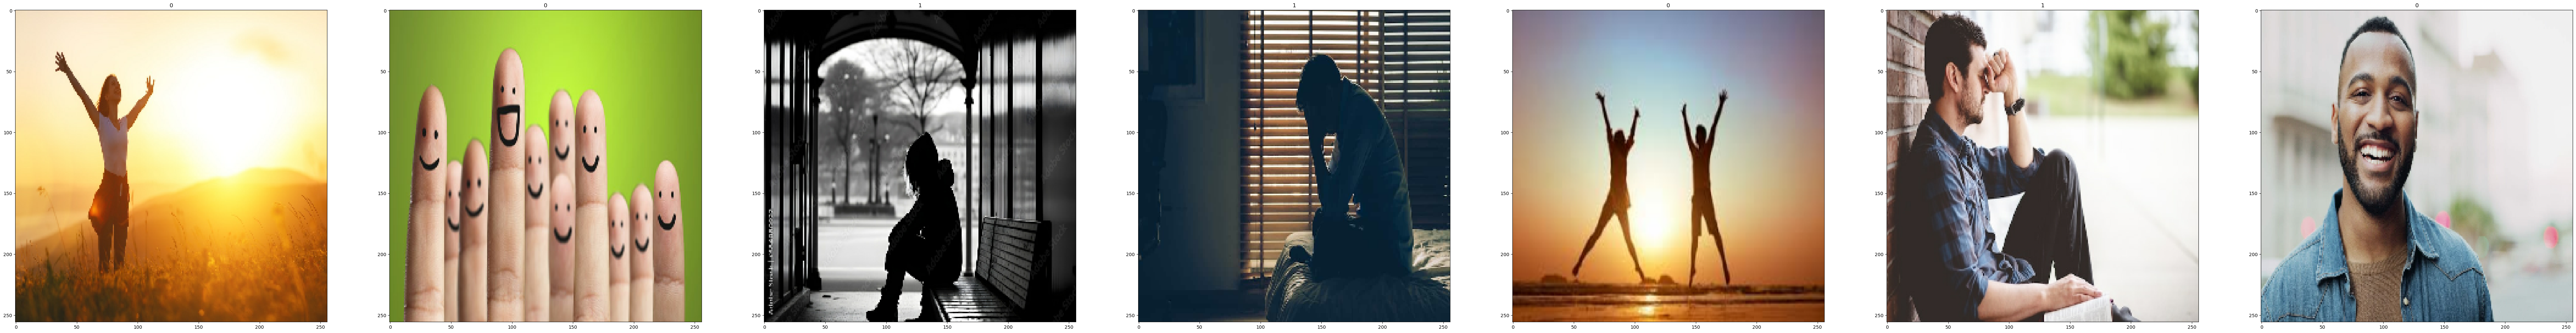

In [287]:
fig, ax = plt.subplots(ncols=7, figsize=(100,20))
for idx, img in enumerate(batch[0][:7]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [288]:
batch[1]

array([0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0])

In [289]:
data = data.map(lambda x,y: (x/400, y))

In [290]:
scaled_iterator=data.as_numpy_iterator()

In [291]:
batch=scaled_iterator.next()

In [292]:
batch[1].max()

1

In [293]:
batch[1].min()

0

In [294]:
len(data)

8

In [295]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)+1

In [296]:
train_size+val_size+test_size

7

In [297]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [298]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [299]:
model = Sequential()

In [300]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [301]:
model.compile('Adamax', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [302]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 30, 30, 16)       

In [303]:
logdir='logs'

In [304]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [305]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
5/5 [==============================] - 12s 1s/step - loss: 0.7779 - accuracy: 0.6000 - val_loss: 0.6477 - val_accuracy: 0.8438
Epoch 2/20
5/5 [==============================] - 8s 1s/step - loss: 0.6202 - accuracy: 0.6125 - val_loss: 0.6227 - val_accuracy: 0.5625
Epoch 3/20
5/5 [==============================] - 8s 1s/step - loss: 0.5787 - accuracy: 0.6250 - val_loss: 0.5313 - val_accuracy: 0.6875
Epoch 4/20
5/5 [==============================] - 8s 1s/step - loss: 0.5368 - accuracy: 0.6750 - val_loss: 0.5331 - val_accuracy: 0.6875
Epoch 5/20
5/5 [==============================] - 8s 1s/step - loss: 0.5035 - accuracy: 0.6812 - val_loss: 0.3692 - val_accuracy: 0.8750
Epoch 6/20
5/5 [==============================] - 8s 1s/step - loss: 0.4494 - accuracy: 0.7688 - val_loss: 0.4518 - val_accuracy: 0.7500
Epoch 7/20
5/5 [==============================] - 8s 1s/step - loss: 0.4385 - accuracy: 0.8125 - val_loss: 0.3149 - val_accuracy: 0.9375
Epoch 8/20
5/5 [========================

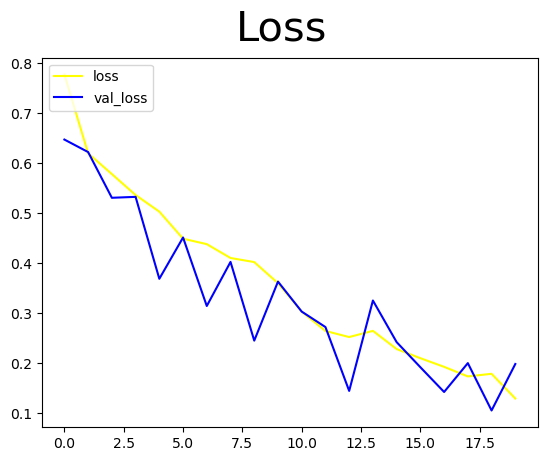

In [350]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='yellow', label='loss')
plt.plot(hist.history['val_loss'], color='blue', label='val_loss')
fig.suptitle('Loss', fontsize=30)
plt.legend(loc="upper left")
plt.show()

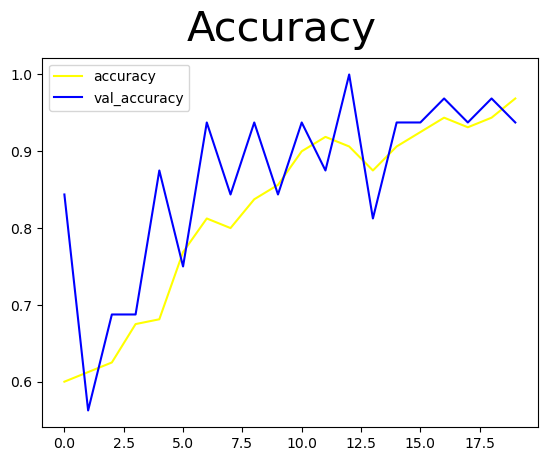

In [351]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='yellow', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='blue', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=30)
plt.legend(loc="upper left")
plt.show()